## Problem
Add a description here, saying that the time series is the gravitational wave signal amplitude generating from a pair of black holes merging and spiraling until they merge completely. As they spiral, both the signal amplitude and the frequency increase over time. We suppose the merging happens well after the 20 steps of our forecast, so that the observed signal trend over time can be used for meaningful predictions.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Define parameters for the synthetic gravitational wave signal
initial_amplitude = 0.01  # Initial amplitude of the wave
amplitude_growth_rate = 0.0001  # Rate at which amplitude increases
initial_frequency = 0.05  # Initial frequency of the wave
frequency_increase_rate = 0.0005  # Rate at which frequency increases
T = 100  # Total time
dt = 0.1  # Time step

# Generate time points
t = np.arange(0, T, dt)

# Generate the gravitational wave signal with increasing amplitude and frequency
amplitude = initial_amplitude + amplitude_growth_rate * t
frequency = initial_frequency + frequency_increase_rate * t
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Add some noise to the signal
noise = np.random.normal(scale=0.015, size=len(t))
noisy_signal = signal + noise

# Create a DataFrame
df = pd.DataFrame({'Time': t, 'Signal': noisy_signal})

df.to_excel('gravitational_wave.xlsx','data')

### Data importation and visualization
Import the excel file and visulaize the data with different techniques

In [2]:
# Exercise 1 
# Upload the excel file damped_oscillator.xlsx using pandas to a dataframe object
series = pd.read_excel('gravitational_wave.xlsx',
                    sheet_name='data', header=0, index_col=0,
                     dtype=float) 
series

,Time,Signal
0,0.0,-0.003323
1,0.1,0.001066
2,0.2,0.027521
3,0.3,0.014881
4,0.4,0.030180
...,...,...
995,99.5,-0.015922
996,99.6,-0.014585
997,99.7,0.018082
998,99.8,0.004967


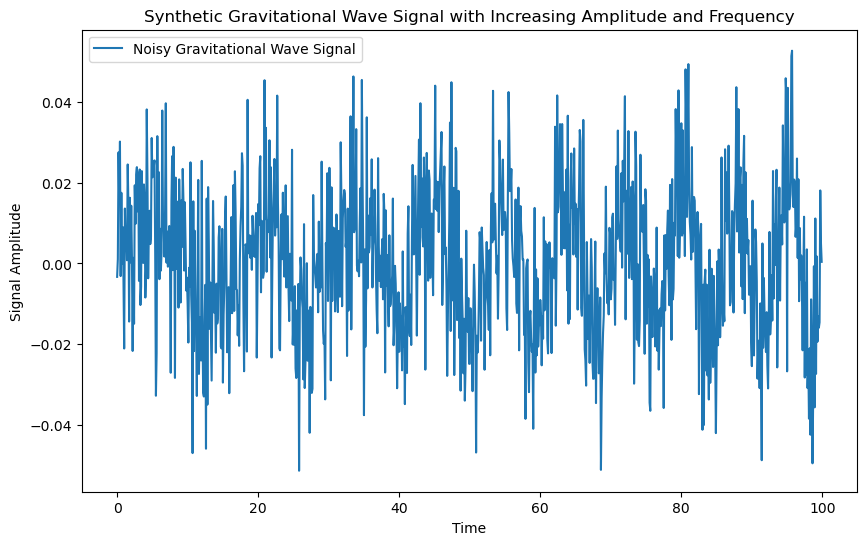

In [3]:
# Exercise 2
# Plot time (x-axis) versus position (y-ais) using matplotlib pyplot. Add appropriate labels
import matplotlib.pyplot as plt

# Plot the synthetic gravitational wave data
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Signal'], label='Noisy Gravitational Wave Signal')
plt.xlabel('Time')
plt.ylabel('Signal Amplitude')
plt.title('Synthetic Gravitational Wave Signal with Increasing Amplitude and Frequency')
plt.legend()
plt.show()

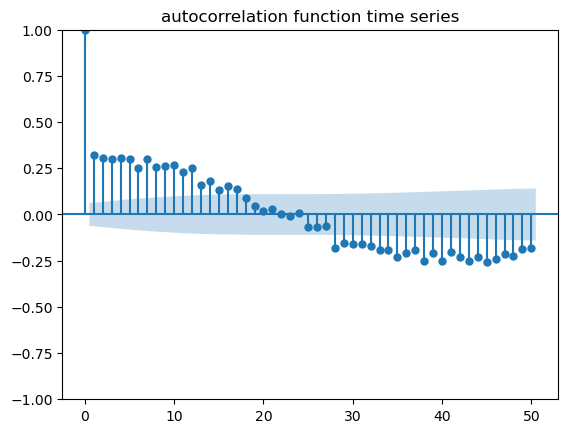

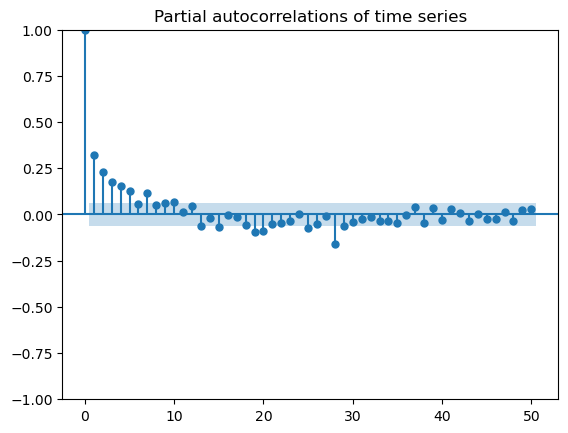

In [4]:
# Exercise 3
# Plot the autocorrelation function time series of the position data (50 lags for example)
# Plot the partial autocorrelation function time series of the position data (50 lags for example)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(series['Signal'], title='autocorrelation function time series', lags=50)
plot_pacf(series['Signal'], title='Partial autocorrelations of time series', lags=50)
plt.show()

### Modeling and forecasting
After basic drawing and visulazation of the data try to analyze the position data and do some forcasting using the SARIMAX model

In [5]:
# Exercise 4
# import itertools, and use it to generate different combinations of parameters for the SARIMAX model
import itertools

# The p and q parameters are given and equal to 2; as itertools 
p = q = range(2, 3)

# Define the d parameter to be an integer between 0 and 2
d = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets (i.e., P, D, Q)
# Use a value of 10 for the seasonality S
seasonal_pdq = [(x[0], x[1], x[2], 10) for x in list(itertools.product(p, d, q))]

In [6]:
# Exercise 5
# Define a SARIMAX the model and identify the optimal parameters according to the AIC criterion
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

# Indentification of best model from different combinations of pdq and seasonal_pdq
best_score, best_param, best_paramSeasonal = float("inf"), None, None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(series['Signal'], order=param, seasonal_order=param_seasonal, enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_score:
                best_score, best_param, best_paramSeasonal = results.aic, param, param_seasonal
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue # if fit fails, just continue to the next parameters combionation

ARIMA(2, 0, 2)x(2, 0, 2, 10) - AIC:-5404.9387677387185
ARIMA(2, 0, 2)x(2, 1, 2, 10) - AIC:-5218.451148490852
ARIMA(2, 0, 2)x(2, 2, 2, 10) - AIC:-4775.853115734463
ARIMA(2, 1, 2)x(2, 0, 2, 10) - AIC:-5376.737356889002
ARIMA(2, 1, 2)x(2, 1, 2, 10) - AIC:-5273.67369391187
ARIMA(2, 1, 2)x(2, 2, 2, 10) - AIC:-5102.312955315474
ARIMA(2, 2, 2)x(2, 0, 2, 10) - AIC:-5150.02567003854
ARIMA(2, 2, 2)x(2, 1, 2, 10) - AIC:-5144.615632904932
ARIMA(2, 2, 2)x(2, 2, 2, 10) - AIC:-4917.6617677869035


In [7]:
# Exercise 7
# Fit the model once again using teh optimal parameters, and print a summary of the results
mod = SARIMAX(series['Signal'], order=best_param, seasonal_order=best_paramSeasonal, enforce_invertibility=False)
results=mod.fit()
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.70770D+00    |proj g|=  1.00215D+00


 This problem is unconstrained.



At iterate    5    f= -2.70782D+00    |proj g|=  7.72576D-01

At iterate   10    f= -2.70917D+00    |proj g|=  6.92758D-01

At iterate   15    f= -2.70925D+00    |proj g|=  7.06524D-02

At iterate   20    f= -2.70933D+00    |proj g|=  3.54965D-01

At iterate   25    f= -2.70947D+00    |proj g|=  3.89529D-01

At iterate   30    f= -2.71117D+00    |proj g|=  1.33777D-01

At iterate   35    f= -2.71137D+00    |proj g|=  1.61910D-01

At iterate   40    f= -2.71147D+00    |proj g|=  1.15746D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     40     52      1     0     0   1.157D-02  -2.711D+00
  F =  -2.71146938386

In [8]:
# Exercise 6
# Print the best set of parameters according to the AIC
print('The best model is ARIMA{}x{} - AIC:{}'.format(best_param, best_paramSeasonal, best_score))

The best model is ARIMA(2, 0, 2)x(2, 0, 2, 10) - AIC:-5404.9387677387185


In [9]:
# Exercise 8
# Forecast future values for 20 steps
n_forecast = 20  # Number of steps to forecast
forecast = results.get_forecast(steps=n_forecast)
forecast_index = np.arange(T, T + n_forecast * dt, dt)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()


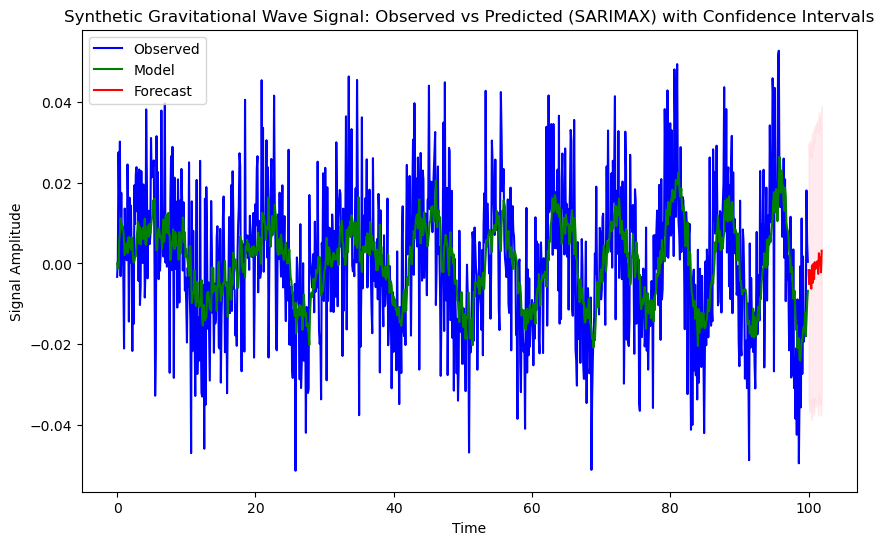

In [10]:
# Exercise 9
# Plot the results, the predicted trend according to the model, and the forecast
plt.figure(figsize=(10, 6))
predictions = results.predict()
# Plot the original data i.e. time (x-axis) vs position
plt.plot(series['Time'].to_numpy(), series['Signal'].to_numpy(), label='Observed', color='blue')
# Plot the time (x-axis) vs predictions 
plt.plot(series['Time'].to_numpy(), predictions.to_numpy(), label='Model', color='green')
# Plot the forecast index (x-axis) vs forecast values
plt.plot(forecast_index, forecast_values.to_numpy(), label='Forecast', color='red')

plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Signal Amplitude')
plt.title('Synthetic Gravitational Wave Signal: Observed vs Predicted (SARIMAX) with Confidence Intervals')
plt.legend()
plt.show()

### Error analysis
Analyse the errors of the predictions

In [11]:
# # Exercise 10
# Compute the:
#   Sum of Squares Total (SST),
#   Summ of Squares Error (SSE),
#   Sum of Squares Regression (SSR),
# and then the coefficient of determination (R²) 
observed = series['Signal']
mean_observed = np.mean(observed)
sst = np.sum((observed - mean_observed) ** 2)
sse = np.sum((observed - predictions) ** 2)
ssr = sst - sse
r2 = 1 - (sse / sst)

# Print the results
print(f'SST: {sst:.2f}')
print(f'SSE: {sse:.2f}')
print(f'SSR: {ssr:.2f}')
print(f'R²: {r2:.2f}')


SST: 0.33
SSE: 0.26
SSR: 0.08
R²: 0.23


In [12]:
# # Exercise 11
# Define the degrees of freedom 
n = len(observed)  # Number of observations
p = len(results.params)  # Number of predictors in SARIMAX

# Calculate MST, MSE, MSR, and F-score
mst = sst / (n - 1)
mse = sse / (n - p - 1)
msr = ssr / p
f_score = msr / mse

# Print the results
print(f'MST: {mst:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MSR: {msr:.2f}')
print(f'F-score: {f_score:.2f}')

MST: 0.00
MSE: 0.00
MSR: 0.01
F-score: 32.60
